In [46]:
#menghubungkan dengan colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [48]:
df = pd.read_csv ("/content/drive/MyDrive/Praktikum_ML/praktikum05/data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [50]:
# Mengubah Nama Kolom (Rename)
df.rename(columns={
    'SepalLengthCm': 'sepal_length',
    'SepalWidthCm': 'sepal_width',
    'PetalLengthCm': 'petal_length',
    'PetalWidthCm': 'petal_width',
    'Species': 'Species'
}, inplace=True)

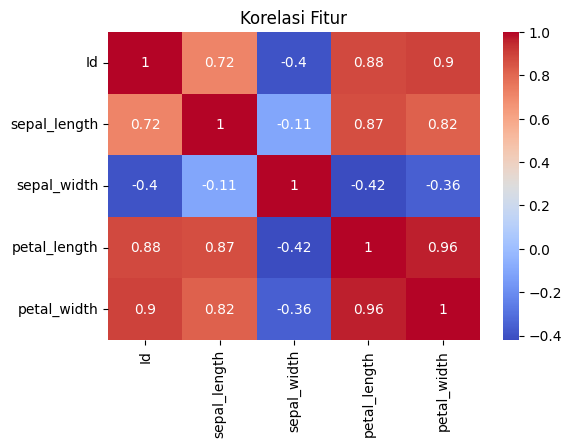

In [52]:
#korelasi
plt.figure(figsize=(6,4))
sns.heatmap(df.drop('Species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

In [53]:
#cek missing value
df.isnull().sum()

,0
Id,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
Species,0


In [54]:
#cek duplicate
df.duplicated().sum()

np.int64(0)

In [55]:
# Buat objek encoder
le = LabelEncoder()

In [56]:
# Encode kolom target 'Species'
df['Species'] = le.fit_transform(df['Species'])

In [57]:
# Tampilkan hasil
print(df.head())
print("\nMapping label numerik:")
for i, label in enumerate(le.classes_):
    print(f"{i} = {label}")

   Id  sepal_length  sepal_width  petal_length  petal_width  Species
0   1           5.1          3.5           1.4          0.2        0
1   2           4.9          3.0           1.4          0.2        0
2   3           4.7          3.2           1.3          0.2        0
3   4           4.6          3.1           1.5          0.2        0
4   5           5.0          3.6           1.4          0.2        0

Mapping label numerik:
0 = Iris-setosa
1 = Iris-versicolor
2 = Iris-virginica


In [58]:
#pisahkan fitur x dan target y
X = df.drop(columns=['Id', 'Species'])
y = df['Species']

In [59]:
#bagi data menjadi 80% Training dan 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nJumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")


Jumlah data training: 120
Jumlah data testing: 30


In [60]:
#buat decision tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [61]:
#Evaluasi model
y_pred = model.predict(X_test)

print("Akurasi: ", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred))

Akurasi:  100.0 %

Confusion Matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [62]:
# Lihat hasil prediksi dibandingkan label aslinya
hasil = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(hasil.head())


     Actual  Predicted
73        1          1
18        0          0
118       2          2
78        1          1
76        1          1


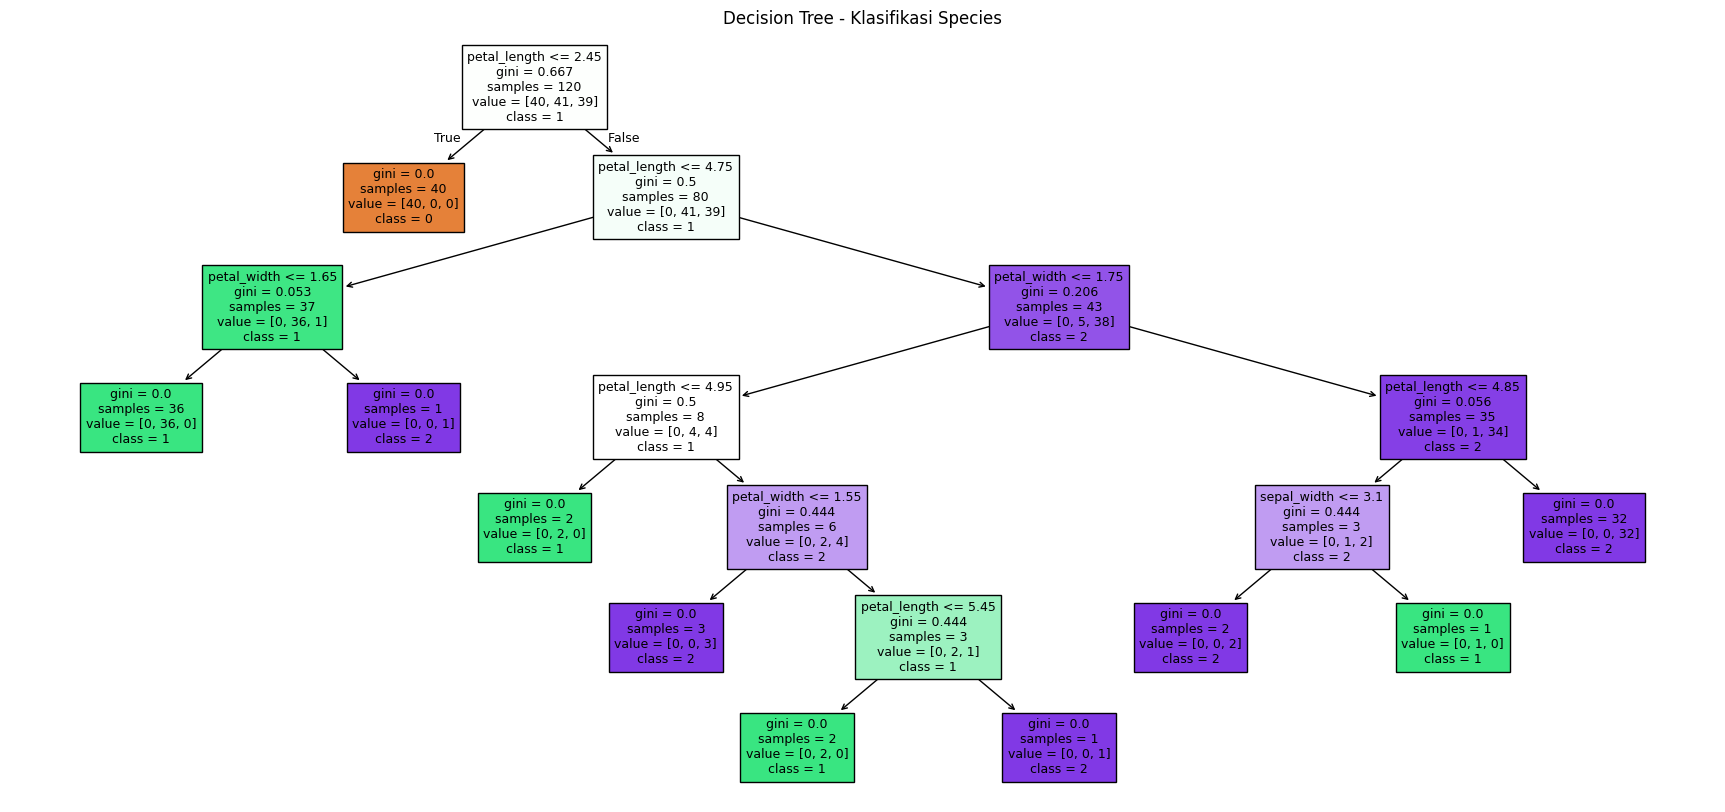

In [63]:
#visualisasi model
plt.figure(figsize=(22,10))
feature_cols = X_train.columns.tolist()
class_names = [str(c) for c in sorted(y_train.unique())]
plot_tree(model, feature_names=feature_cols, class_names=class_names, filled=True, fontsize=9)
plt.title("Decision Tree - Klasifikasi Species")
plt.show()